<h1 align = 'center'>Exploratory Data Analysis - Terrorism</h1>
<br>
<h3 align = "center">Author - Naman Talwar</h3>
<br>

<h3>Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

<br>
<h3>Reading Dataset

In [3]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
data.shape

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

<br>
<h3>Cleaning the Data</h3>

In [8]:
data= data [["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location",
             "summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


<br>
<h3>Renaming the Columns</h3>

In [9]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region",
                    "provstate":"Province/State","city":"City","latitude":"Latitude","longitude":"Longitude",
                     "location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                    "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded",
                    "addnotes":"Add Notes"},inplace=True)

data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
Year              181691 non-null int64
Month             181691 non-null int64
Day               181691 non-null int64
Country           181691 non-null object
Region            181691 non-null object
Province/State    181270 non-null object
City              181257 non-null object
Latitude          177135 non-null float64
Longitude         177134 non-null float64
Location          55495 non-null object
Summary           115562 non-null object
Attack Type       181691 non-null object
Target Type       181691 non-null object
Group Name        181691 non-null object
Motive            50561 non-null object
Weapon Type       181691 non-null object
Killed            171378 non-null float64
Wounded           165380 non-null float64
Add Notes         28289 non-null object
dtypes: float64(4), int64(3), object(12)
memory usage: 26.3+ MB


In [11]:
data.shape

(181691, 19)

In [12]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [13]:
data['Killed'] = data['Killed'].fillna(0)
data["Wounded"]=data['Wounded'].fillna(0)
data["Casualty"] = data['Killed']+data["Wounded"]

In [14]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


<br>
<h3>Observations</h3>
1. The data consists of terrorist activities ranging from 1970 to 2017
2. Maximum number of people killed in an event were 1570
3. Maximum number of people wounded in an activity were 8191
4. Maximum number of casualties in an event were 9574 

<br>
<h3>Visualizing the data</h3>
<br>
<h4>1. Year Wise Attacks</h4>
Number of attacks in each year 

In [15]:
attacks=data['Year'].value_counts(dropna = False).sort_index().to_frame().reset_index().rename(columns= {"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


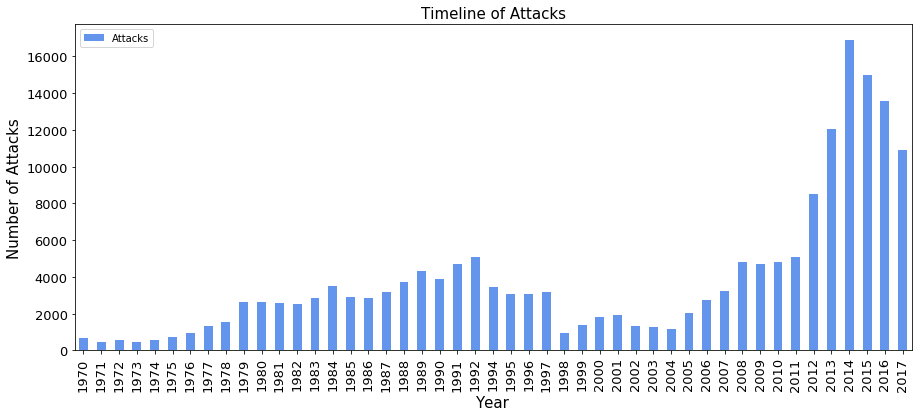

In [16]:
attacks.plot(kind="bar", color = "cornflowerblue", figsize = (15,6),fontsize = 13)
plt.title("Timeline of Attacks",fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 15)
plt.show()

1. Most Number of Attacks(16903) in 2014
2. Least Number of Attacks(471) in 1971
<br>
<br>
    <h4>2. Total Casualties in Each Year</h4>

In [17]:
yc = data[["Year", "Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


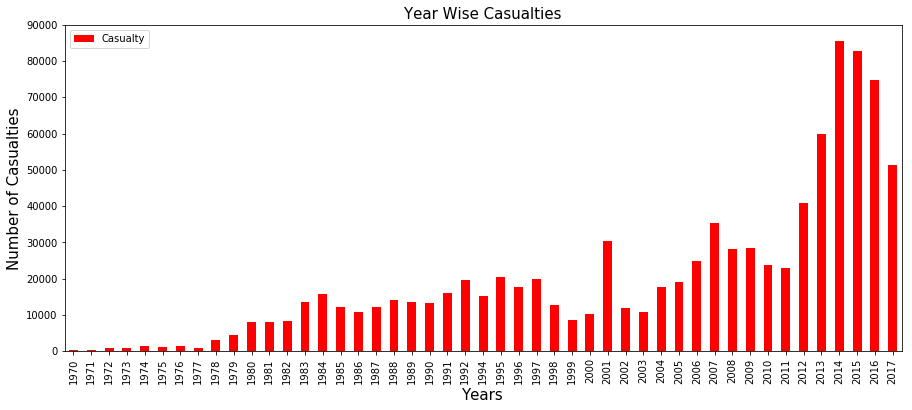

In [18]:
yc.plot(kind="bar", color = "red", figsize = (15,6))
plt.title("Year Wise Casualties",fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Casualties", fontsize = 15)
plt.show()

<br>
<br>
<h4>3. Killed in Each Year</h4>

In [19]:
yk=data[["Year","Killed" ]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


<br>
<h4>4.Wounded in Each Year</h4>

In [20]:
yw = data[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


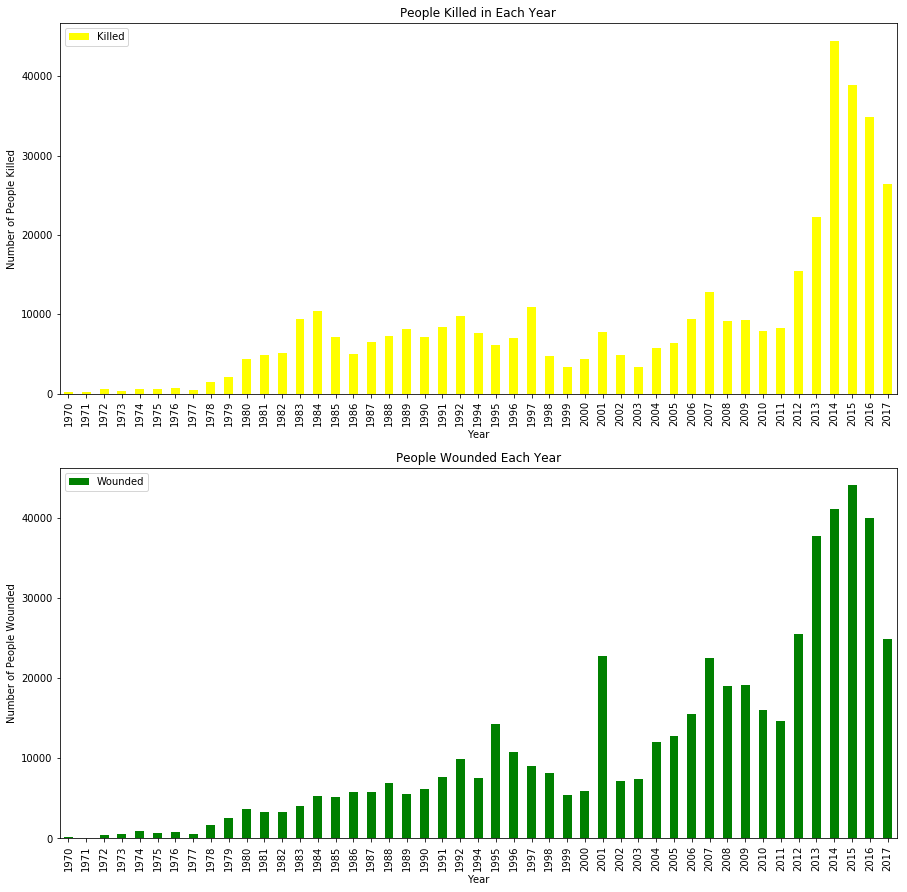

In [21]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1 =fig.add_subplot(2,1,2)

yk.plot(kind = "bar",color = "yellow",figsize = (15,15),ax=ax0)
ax0.set_title("People Killed in Each Year")
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of People Killed")

yw.plot(kind = "bar",color = "green",figsize = (15,15),ax=ax1)
ax1.set_title("People Wounded Each Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of People Wounded")

plt.show()

<br>
<h3>Region Wise Attacks</h3>
<br>
1. Distribution of Terrorist Attacks over Regions from 1970-2017
<br>

In [22]:
reg = pd.crosstab(data.Year,data.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


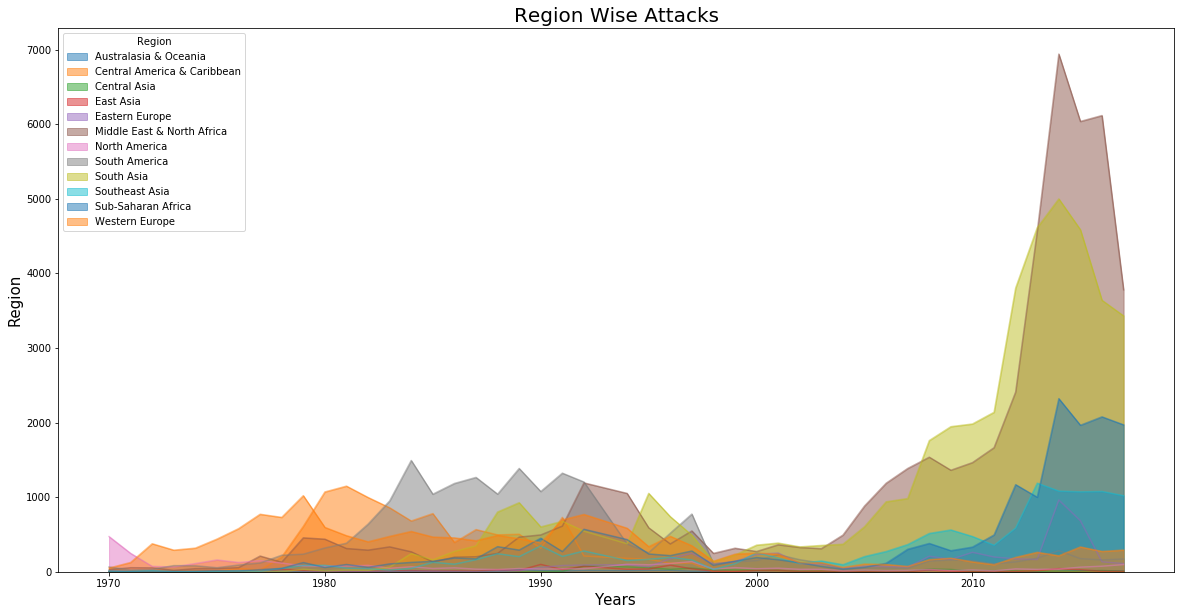

In [23]:
reg.plot(kind= "area", figsize = (20,10),stacked = False, alpha= 0.5)
plt.title("Region Wise Attacks",fontsize = 20)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Region",fontsize = 15)
plt.show()

<br>
2. Total Terrorist Attacks in each Region from 1970-2017
<br>

In [24]:
regt= reg.transpose()
regt["Total"]= regt.sum(axis=1)
ra = regt["Total"].sort_values(ascending = False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

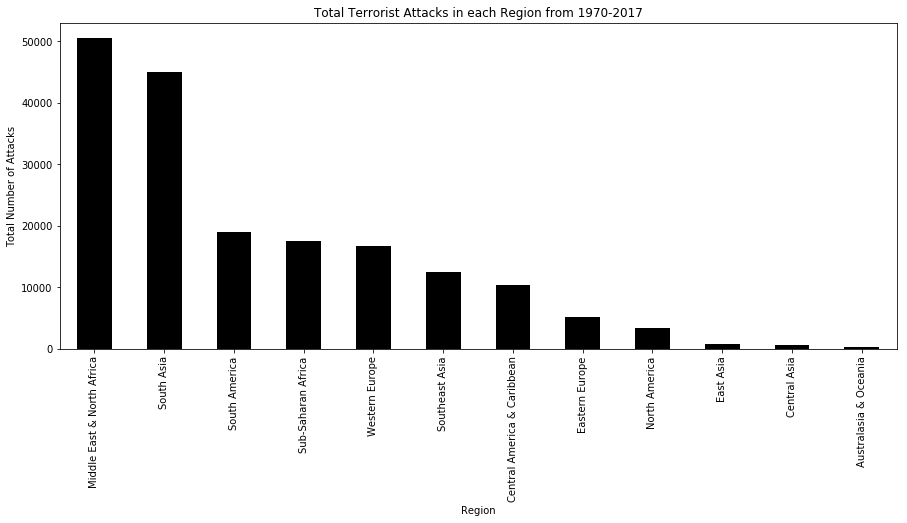

In [25]:
ra.plot(kind="bar",color = "black", figsize = (15,6))
plt.title("Total Terrorist Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Total Number of Attacks")
plt.show()

<br>
3.Total Casualties in each Region
<br>

In [26]:
rc= data[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending = False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


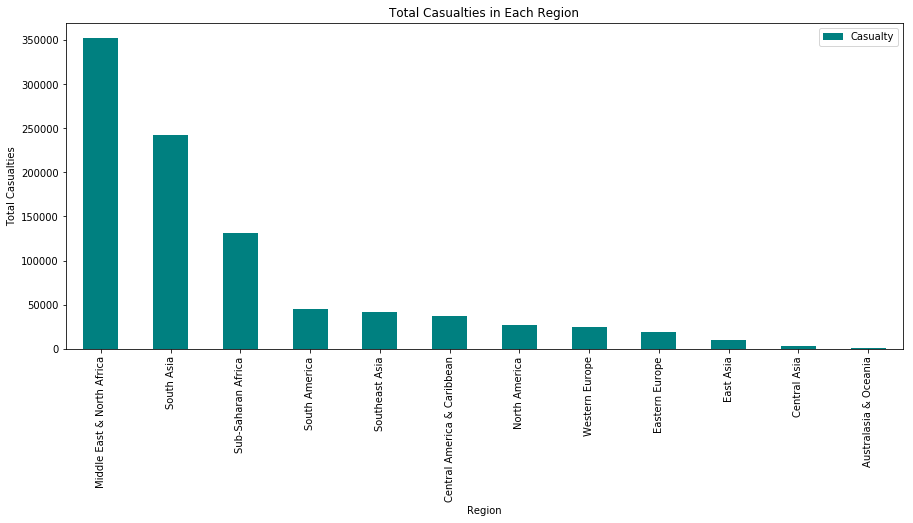

In [27]:
rc.plot(kind = "bar", figsize = (15,6), color = "teal")
plt.title("Total Casualties in Each Region")
plt.xlabel("Region")
plt.ylabel("Total Casualties")
plt.show()

<br>
4. killed in Each Region
<br>

In [28]:
rk=data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending = False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


<br>
5. Wounded in Each Region
<br>

In [29]:
rw= data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending = False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


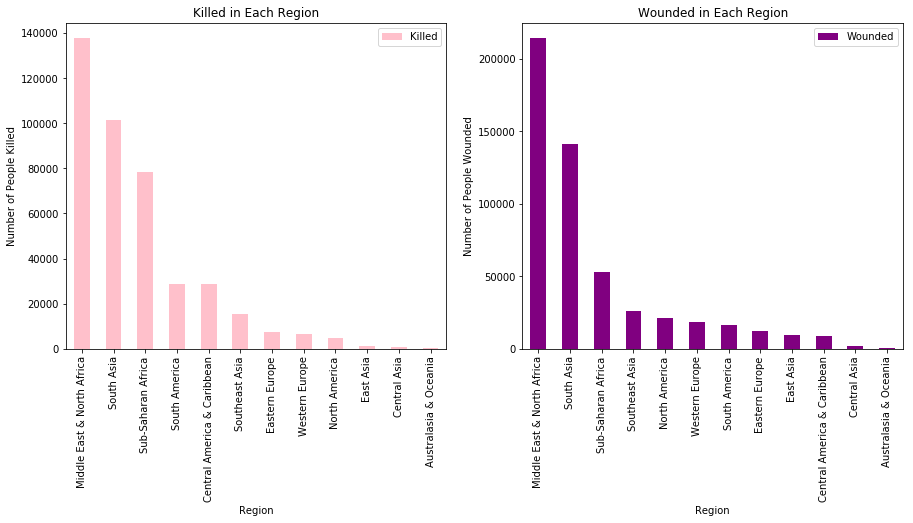

In [30]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

rk.plot(kind = "bar",color = "pink",figsize = (15,6),ax=ax0)
ax0.set_title("Killed in Each Region")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Killed")

rw.plot(kind = "bar",color ="purple",figsize=(15,6),ax=ax1)
ax1.set_title("Wounded in Each Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Number of People Wounded")

plt.show()

<br>
<h3>3. Country Wise Attacks - Top 10</h3>
<br>
1. Number of Attacks in Each Country 
<br>

In [31]:
ct = data["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

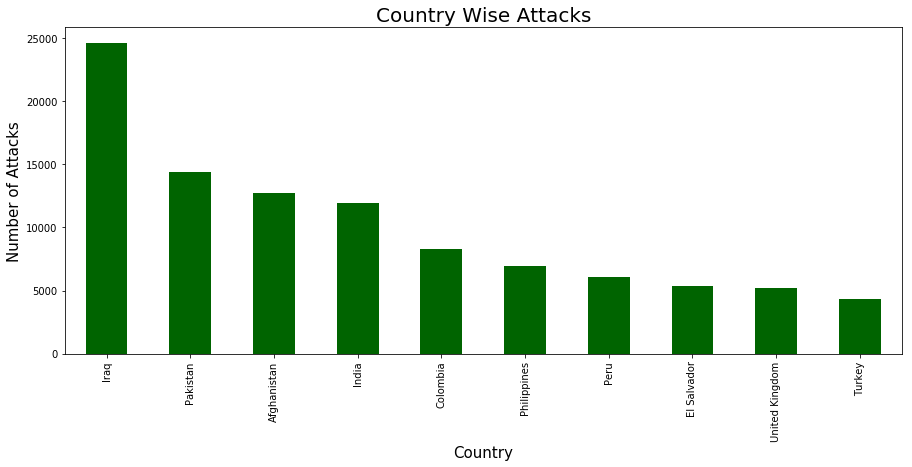

In [32]:
ct.plot(kind = "bar", color = "darkgreen",figsize = (15,6))
plt.title("Country Wise Attacks",fontsize = 20)
plt.xlabel("Country",fontsize= 15)
plt.ylabel("Number of Attacks",fontsize = 15)
plt.show()

<br>
2. Number of Casualties in Each Country
<br>

In [33]:
cnc =data[["Country","Casualty"]].groupby("Country").sum().sort_values(by= "Casualty",ascending = False)
cnc.head(10)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


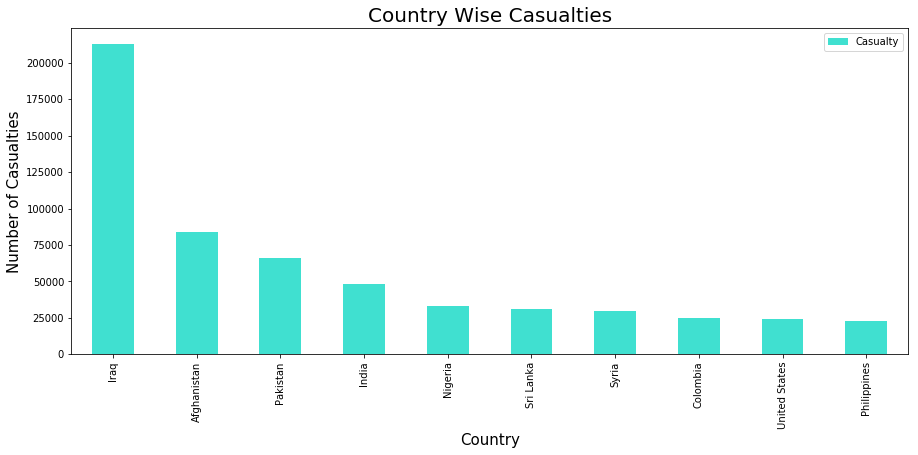

In [34]:
cnc[:10].plot(kind = "bar",color = "turquoise",figsize= (15,6))
plt.title("Country Wise Casualties",fontsize = 20)
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Number of Casualties",fontsize = 15)
plt.show()

<br>
3. Killed in Each Country
<br>

In [35]:
cnk = data[["Country", 'Killed']].groupby("Country").sum().sort_values(by = "Killed", ascending = False)
cnk.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


<br>
4. Wounded in Each Country
<br>

In [36]:
cnw = data[["Country", "Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending = False)
cnw.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


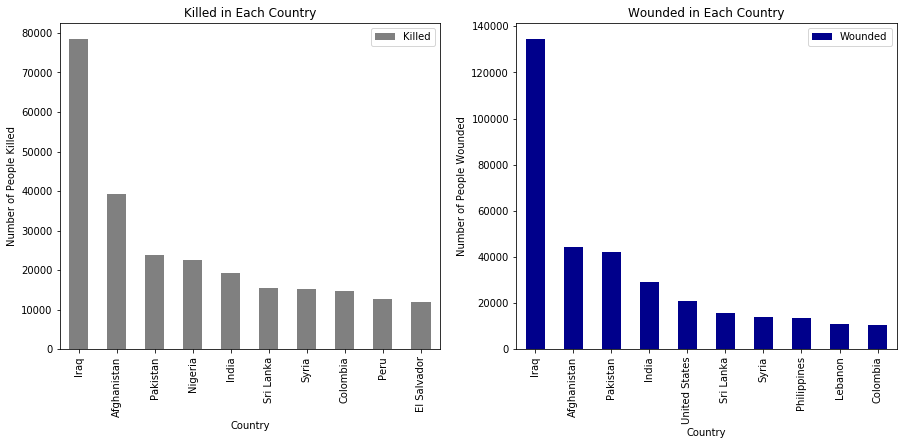

In [37]:
fig= plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

cnk[:10].plot(kind = "bar", color = "grey", figsize = (15,6),ax=ax0)
ax0.set_title("Killed in Each Country")
ax0.set_xlabel("Country")
ax0.set_ylabel("Number of People Killed")

cnw[:10].plot(kind = "bar",color = "darkblue",figsize = (15,6),ax=ax1)
ax1.set_title("Wounded in Each Country")
ax1.set_xlabel("Country")
ax1.set_ylabel("Number of People Wounded")

plt.show()

<br>
<h3>City Wise Attacks - Top 10</h3>
<br>
1. Number of Attacks in Each City
<br>

In [38]:
city = data["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

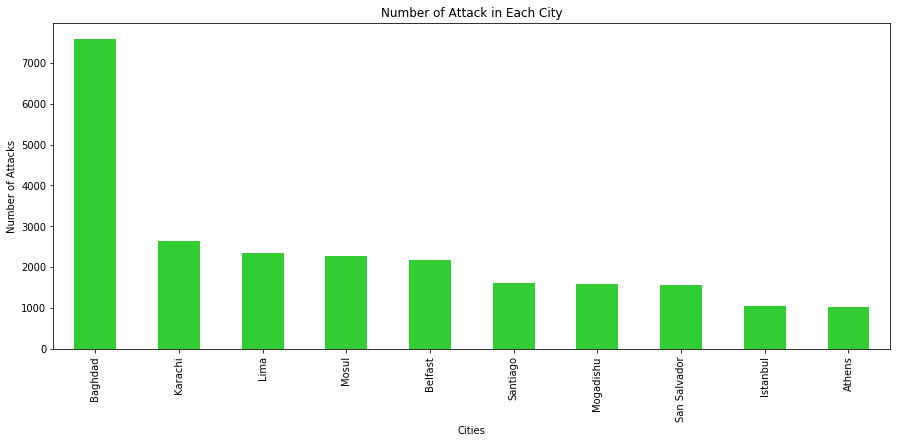

In [39]:
city.plot(kind = "bar", color = "limegreen",figsize = (15,6))
plt.title("Number of Attack in Each City")
plt.xlabel("Cities")
plt.ylabel("Number of Attacks")
plt.show()

<br>
2. Total Casualties in Each City
<br>

In [40]:
cc = data[["City","Casualty"]].groupby("City").sum().sort_values(by = "Casualty", ascending = False)
cc.head(10)

,Casualty
City,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0


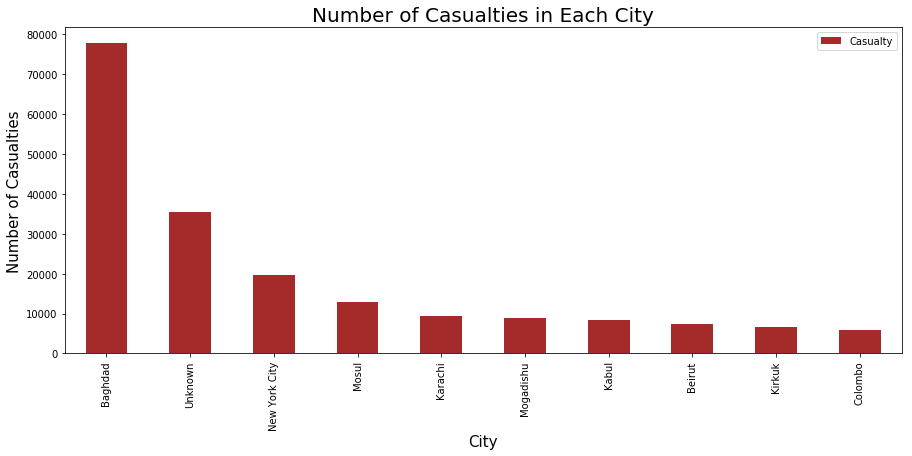

In [41]:
cc[:10].plot(kind = "bar",color = "brown",figsize = (15,6))
plt.title("Number of Casualties in Each City",fontsize = 20)
plt.xlabel("City",fontsize = 15)
plt.ylabel("Number of Casualties",fontsize =15)
plt.show()

<br>
3. Total Number of People killed in Each City
<br>

In [42]:
ck = data[["City", "Killed"]].groupby("City").sum().sort_values(by = "Killed",ascending = False)
ck.head(10)

,Killed
City,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0


<br>
4. Total Number of People Wounded in Each City
<br>

In [43]:
cw = data[["City","Wounded"]].groupby("City").sum().sort_values(by = "Wounded",ascending = False)
cw.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0


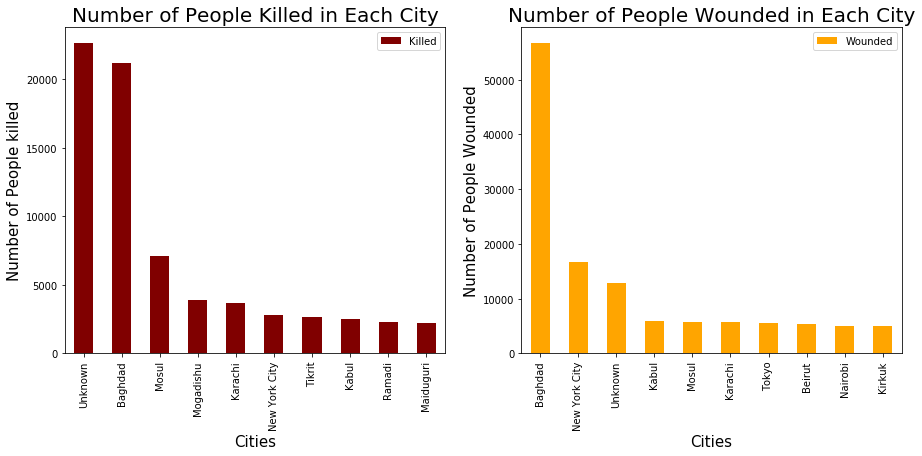

In [44]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ck[:10].plot(kind = "bar",color = "maroon",figsize = (15,6), ax=ax0)
ax0.set_title("Number of People Killed in Each City",fontsize = 20)
ax0.set_xlabel("Cities",fontsize = 15)
ax0.set_ylabel("Number of People killed",fontsize = 15)

cw[:10].plot(kind = "bar",color = "orange",figsize = (15,6), ax=ax1)
ax1.set_title("Number of People Wounded in Each City",fontsize = 20)
ax1.set_xlabel("Cities",fontsize = 15)
ax1.set_ylabel("Number of People Wounded", fontsize = 15)

plt.show()

<br>
<h3>Terrorist Group Wise Attacks - Top 10</h3>
<br>
1. Number of Attacks by Each Group

In [45]:
grp = data["Group Name"].value_counts()[1:11]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

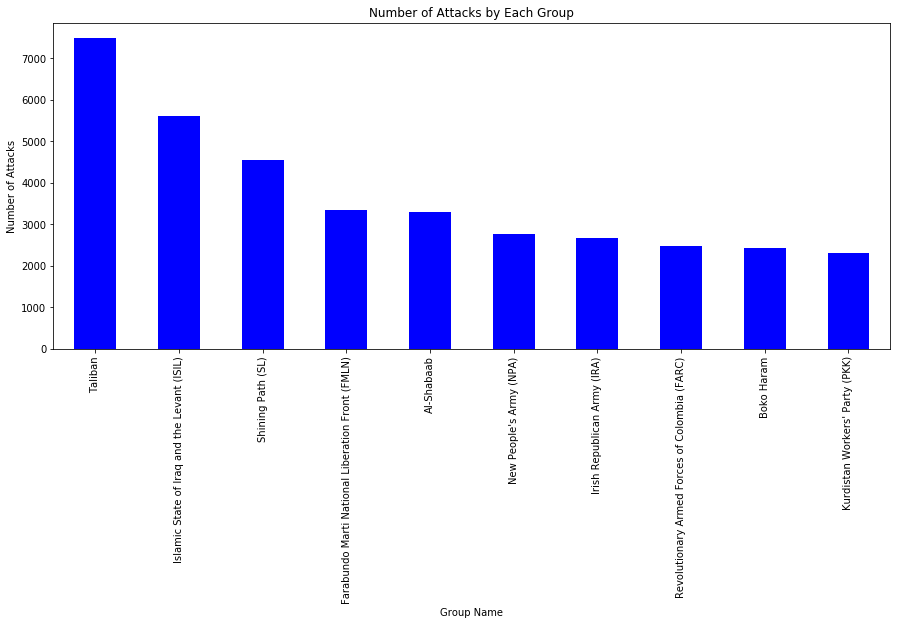

In [46]:
grp.plot(kind = "bar",color = "blue", figsize = (15,6))
plt.title("Number of Attacks by Each Group")
plt.xlabel("Group Name")
plt.ylabel("Number of Attacks")
plt.show()

<br>
2. Total Casualties by Each Group
<br>

In [47]:
gc = data[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty", ascending = False)
gc.head(10)

,Casualty
Group Name,
Unknown,322706.0
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0


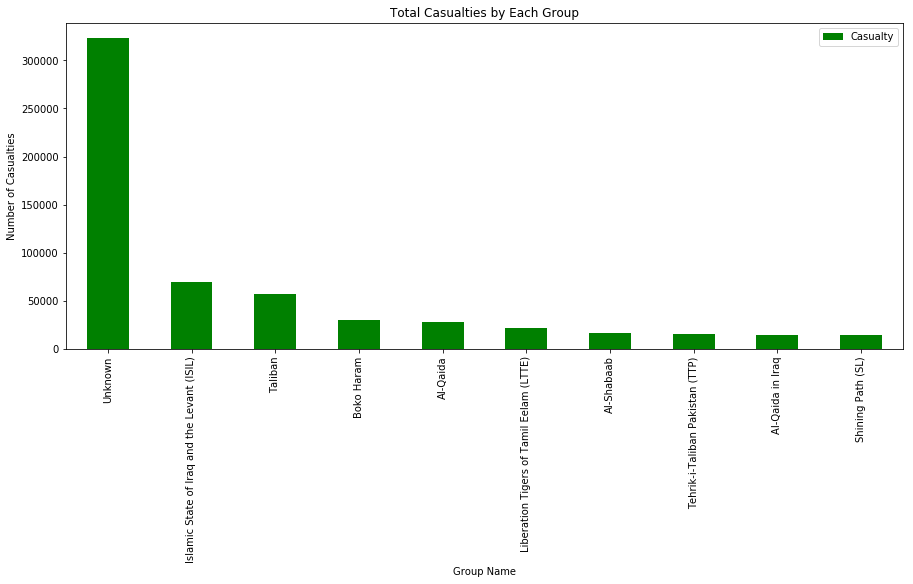

In [48]:
gc[:10].plot(kind = "bar", color = "green",figsize = (15,6))
plt.title("Total Casualties by Each Group")
plt.xlabel("Group Name")
plt.ylabel("Number of Casualties")
plt.show()

<br>
3. Total Number of People Killed by Each Group
<br>

In [49]:
gk = data[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by = "Killed", ascending = False)
gk.head(10)

,Killed
Group Name,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


<br>
4. Total Number of People Wounded by Each Group
<br>

In [50]:
gw = data[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by = "Wounded",ascending =False)
gw.head(10)

,Wounded
Group Name,
Unknown,210339.0
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0


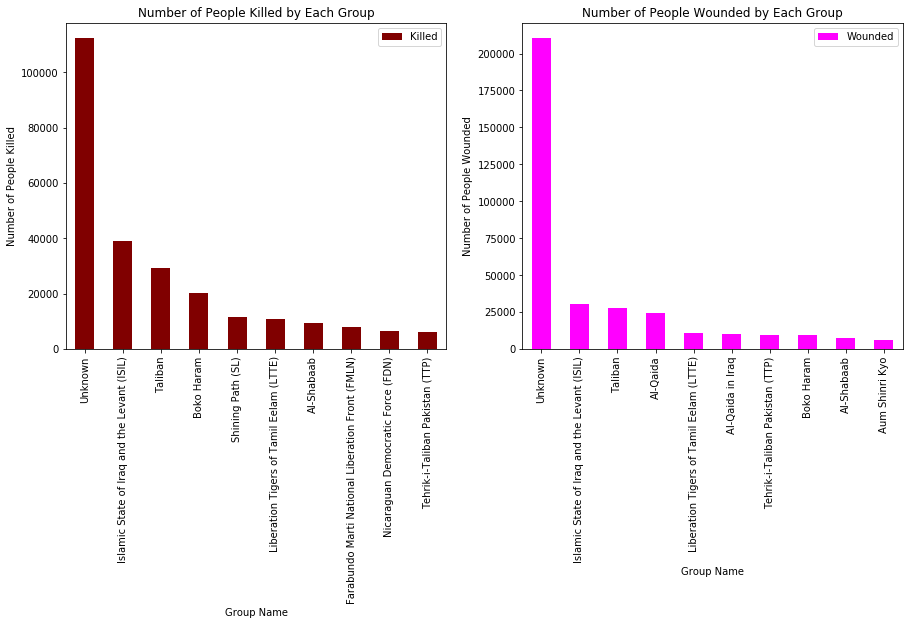

In [51]:
fig  = plt.figure()
ax0  = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

gk[:10].plot(kind = "bar", color = "Maroon", figsize = (15,6), ax=ax0)
ax0.set_title("Number of People Killed by Each Group")
ax0.set_xlabel("Group Name")
ax0.set_ylabel("Number of People Killed")

gw[:10].plot(kind = "bar",color = "magenta", figsize = (15,6),ax= ax1)
ax1.set_title("Number of People Wounded by Each Group")
ax1.set_xlabel("Group Name")
ax1.set_ylabel("Number of People Wounded")

plt.show()

<br>
<h3>Attack Type Wise Attacks</h3>
<br>
1. Number of Attacks by Each Attack Type
<br>

In [52]:
at = data["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

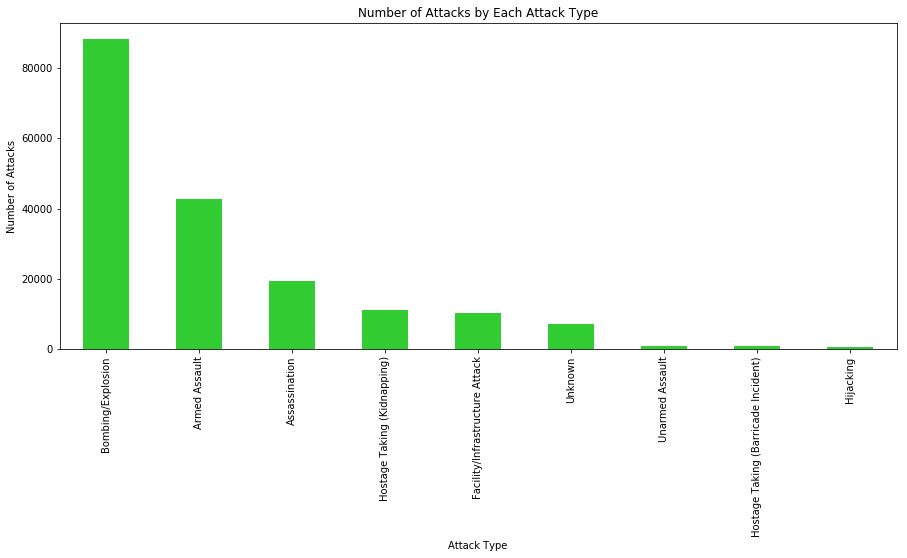

In [53]:
at.plot(kind = "bar", color = "limegreen",figsize = (15,6))
plt.title("Number of Attacks by Each Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Attacks")
plt.show()

<br>
2. Total Casualties by Each Attack Type
<br>

In [54]:
atc = data[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by = "Casualty",ascending = False)
atc

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


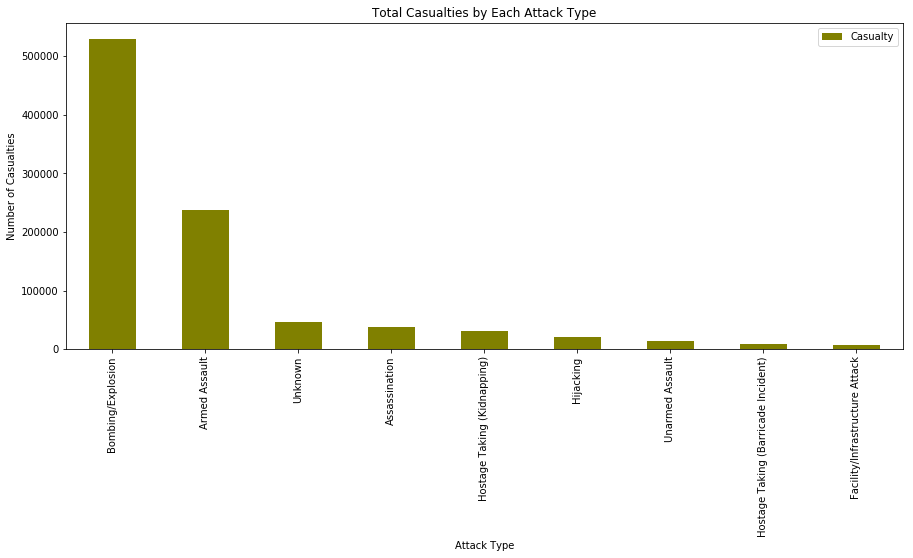

In [55]:
atc.plot(kind = "bar",color = "olive",figsize = (15,6))
plt.title("Total Casualties by Each Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Casualties")
plt.show()

<br>
3. Number of People Killed by Each Attack Type
<br>

In [56]:
atk = data[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by = "Killed",ascending = False)
atk

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


<br>
4. Number of People Wounded by Each Attack Type
<br>

In [57]:
atw = data[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by = "Wounded",ascending = False)
atw

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


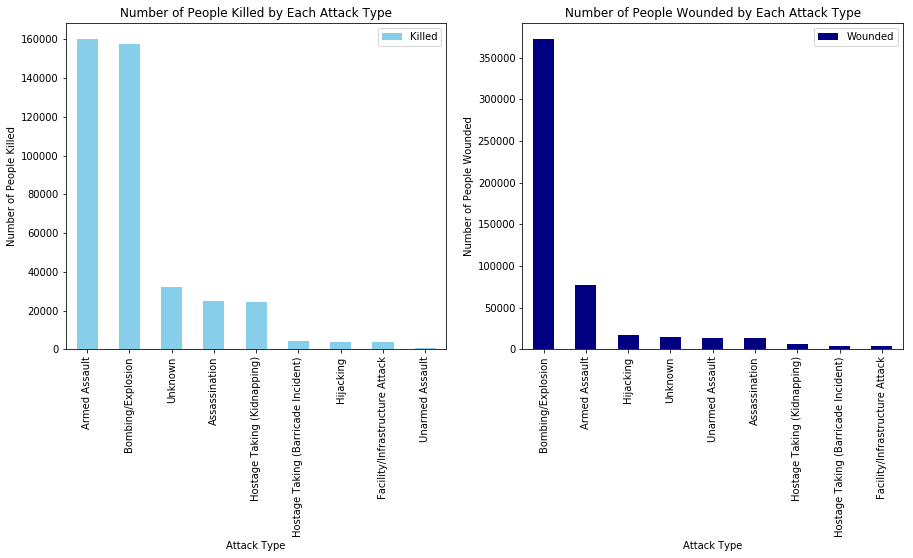

In [58]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

atk.plot(kind = "bar",color = "skyblue", figsize = (15,6),ax = ax0)
ax0.set_title("Number of People Killed by Each Attack Type")
ax0.set_xlabel("Attack Type")
ax0.set_ylabel("Number of People Killed")

atw.plot(kind = "bar",color = "navy",figsize = (15,6),ax = ax1)
ax1.set_title("Number of People Wounded by Each Attack Type")
ax1.set_xlabel("Attack Type")
ax1.set_ylabel("Number of People Wounded")

plt.show()

<br>
<h3>Target Type Wise Attacks</h3>
<br>
1. Number of Attacks over Each Target Type
<br>

In [59]:
ta = data["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

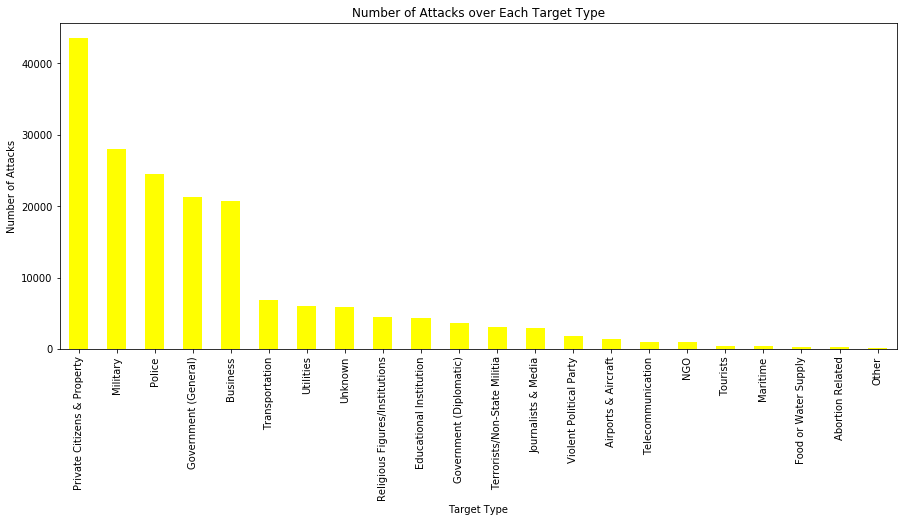

In [60]:
ta.plot(kind = "bar",color = "yellow",figsize = (15,6))
plt.title("Number of Attacks over Each Target Type")
plt.xlabel("Target Type")
plt.ylabel("Number of Attacks")
plt.show()

<br>
2. Number of Casualties over Each Tarrget Type
<br>

In [61]:
tc  = data[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by= "Casualty",ascending = False)
tc

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


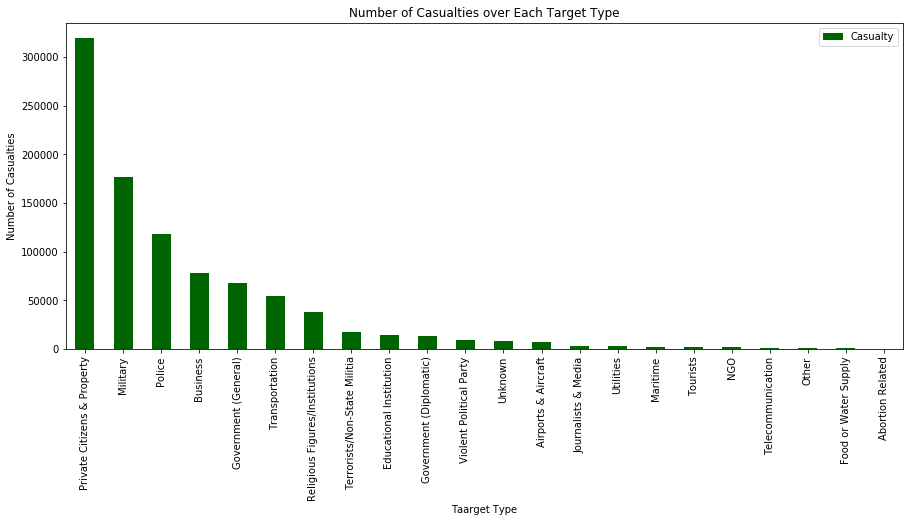

In [62]:
tc.plot(kind = "bar", color = "darkgreen", figsize = (15,6))
plt.title("Number of Casualties over Each Target Type")
plt.xlabel("Taarget Type")
plt.ylabel("Number of Casualties")
plt.show()

<br>
3. Number of People Killed over Each Target Type
<br>

In [63]:
tk = data[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by = "Killed",ascending = False )
tk

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


<br>
4. Number of People Wounded over Each Target Type
<br>

In [64]:
tw = data[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by = "Wounded",ascending = False)
tw

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


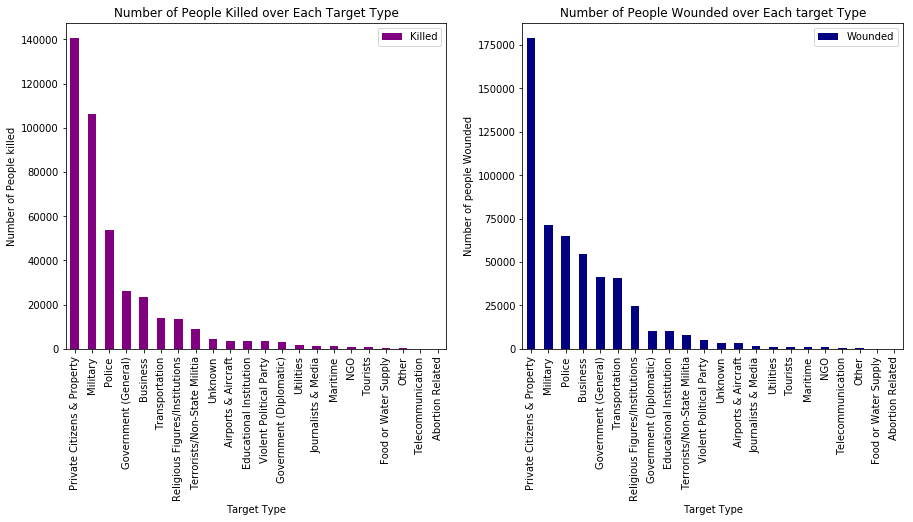

In [65]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

tk.plot(kind = "bar", color = "purple", figsize = (15,6),ax =ax0)
ax0.set_title("Number of People Killed over Each Target Type")
ax0.set_xlabel("Target Type")
ax0.set_ylabel("Number of People killed")

tw.plot(kind = "bar",color = "navy", figsize = (15,6),ax = ax1)
ax1.set_title("Number of People Wounded over Each target Type")
ax1.set_xlabel("Target Type")
ax1.set_ylabel("Number of people Wounded")

plt.show()

<br>
<h3>Worldwide Effect of Terrorist Attacks</h3>
<br>
1. Total Casualties
<br>

In [86]:
casualty= data.loc[:,"Casualty"].sum()
print("Total Number of Casualties : ",casualty)

Total Number of Casualties :  935737.0


<br>
2. Killed by Terrorist Attacks
<br>

In [87]:
killed = data.loc[:,"Killed"].sum()
print("Number of People Killed : ",killed)

Number of People Killed :  411868.0


<br>
3. Wounded by Terrorist Attacks
<br>

In [88]:
wounded = data.loc[:,"Wounded"].sum()
print("Number of People Wounded : ",wounded)

Number of People Wounded :  523869.0
